<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("../data/seeds.csv")

In [3]:
# A:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

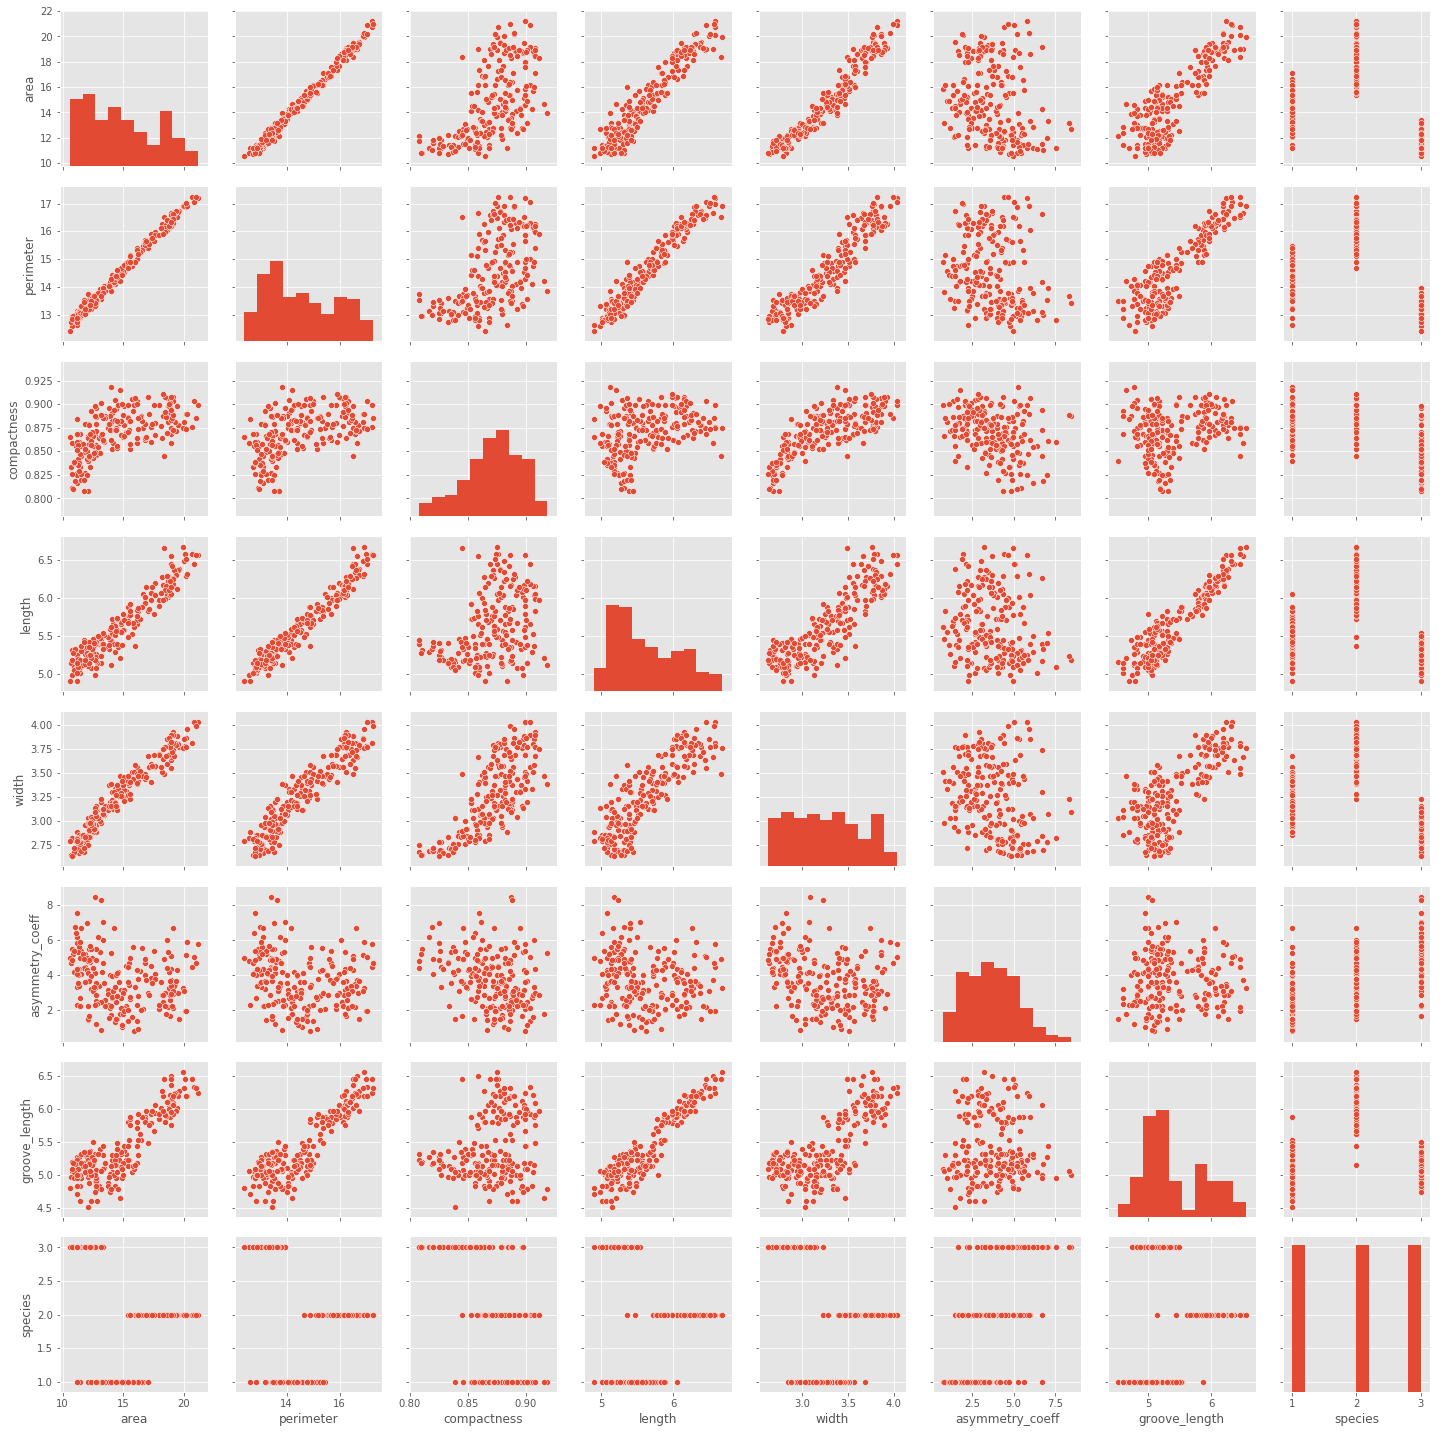

In [4]:
# Plot the Data to see the distributions/relationships
sns.pairplot(seeds)

In [5]:
# Check for nulls
seeds.isnull().sum()

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

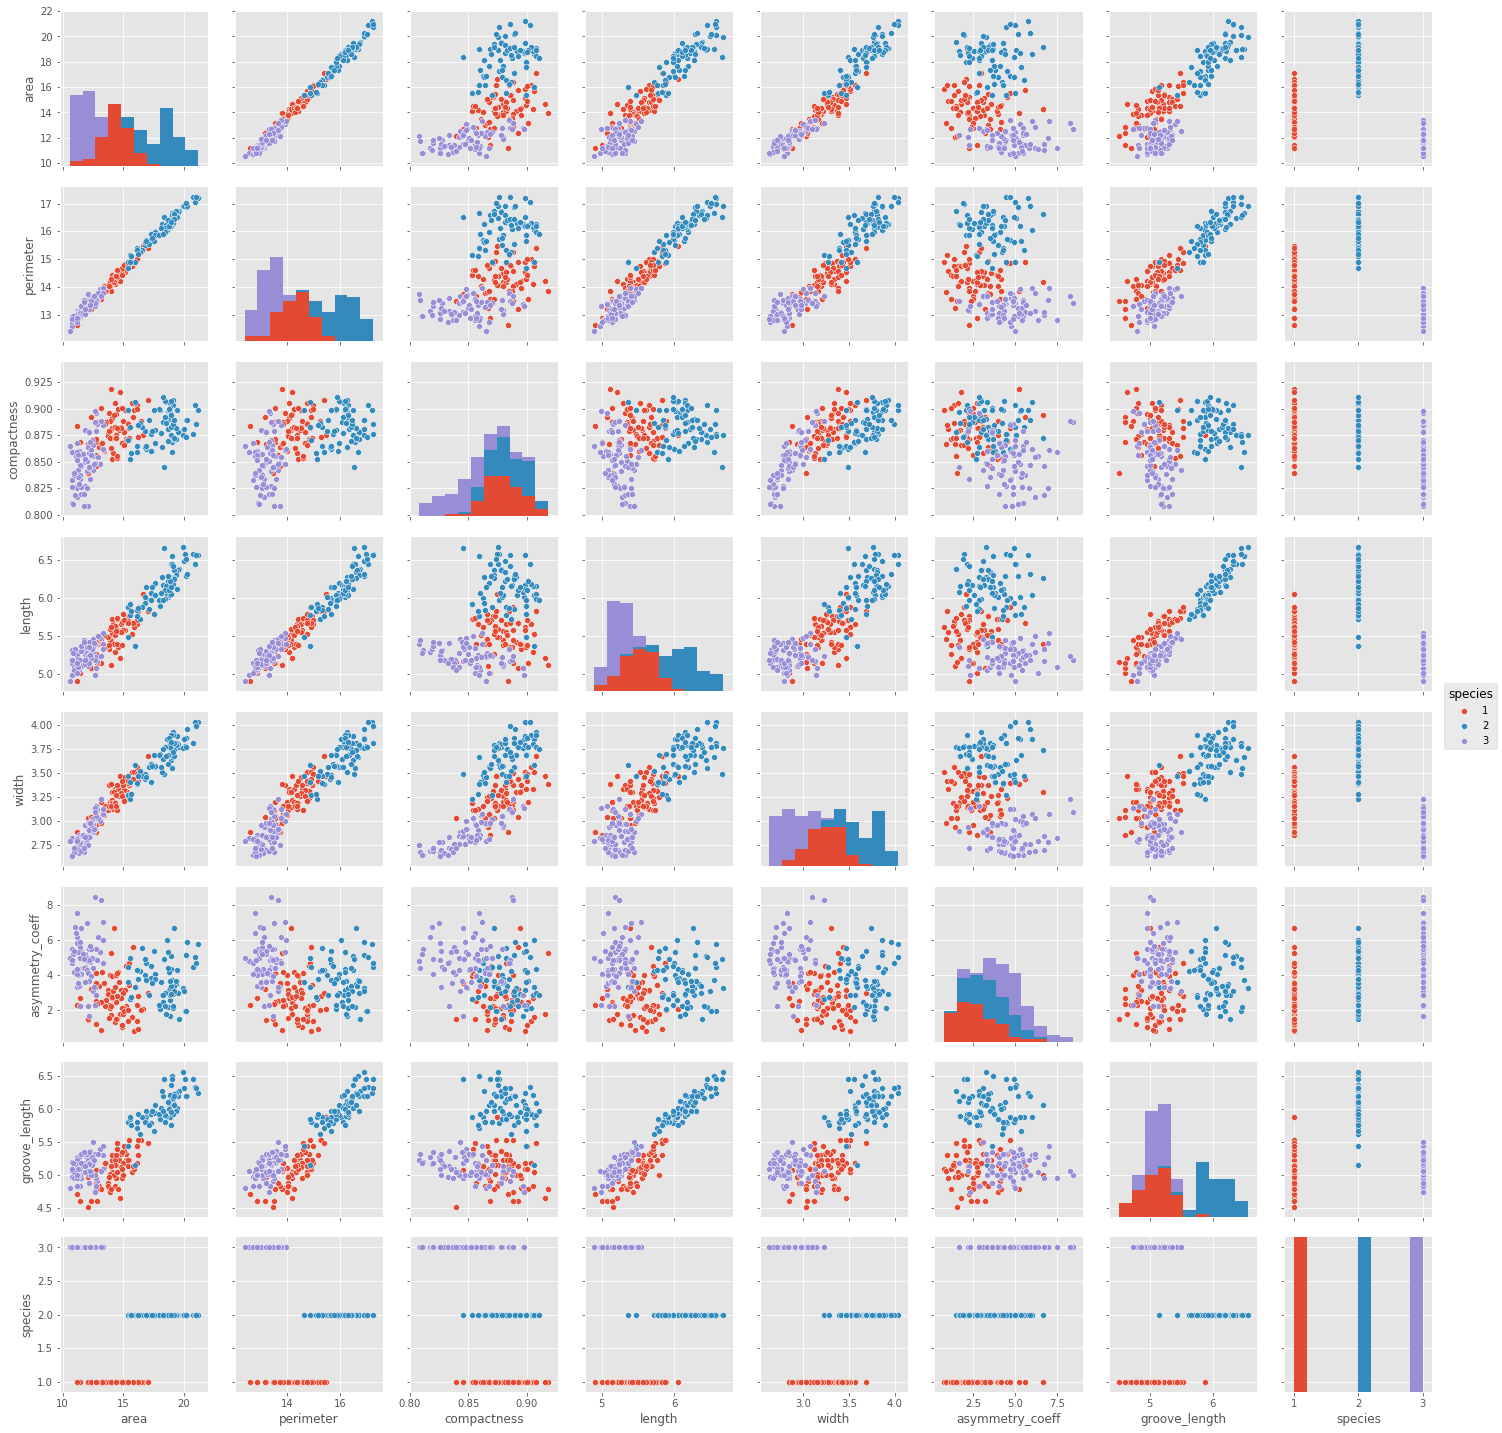

In [6]:
# Look at the real species labels.
sns.pairplot(data=seeds, hue='species')

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

In [7]:
seeds.species.value_counts()  # note 3 evenly distributed species

3    70
2    70
1    70
Name: species, dtype: int64

In [8]:
seeds.dtypes   # note species type is the oddball

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
dtype: object

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [16]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [17]:
# A:
y = seeds.species
X = seeds.drop('species', axis=1)

In [18]:
X.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [28]:
from sklearn.cluster import KMeans
Kmean_default = KMeans()   # using default n_clusters=8
Kmean_default.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 5. Get the labels and centroids for our first clustering model.

In [29]:
# A:
labels = Kmean_default.labels_
print labels

[3 3 6 6 3 6 6 6 3 3 4 6 6 6 6 6 2 3 3 7 6 6 3 0 3 3 0 0 6 6 0 4 6 6 3 3 3
 4 6 2 6 6 0 4 6 6 3 6 6 3 6 4 6 6 3 3 6 3 3 0 0 0 0 6 0 0 3 6 3 0 4 4 4 1
 4 4 4 5 5 4 4 5 5 1 1 1 1 1 5 5 1 1 1 5 5 4 1 1 1 1 4 1 5 1 1 1 1 4 1 1 1
 1 1 5 5 1 5 1 1 1 5 1 4 1 4 5 5 1 1 4 1 1 4 4 4 6 4 3 3 4 2 2 2 2 7 2 0 7
 0 7 7 2 7 7 7 7 7 7 7 7 0 7 7 7 2 0 7 7 7 7 2 2 7 7 7 7 7 7 2 0 7 7 7 7 2
 7 7 7 2 7 7 7 7 7 7 7 2 7 0 0 2 0 7 2 7 7 7 2 7 2]


In [30]:
clusters = Kmean_default.cluster_centers_
print clusters

[[ 12.435       13.425        0.86675      5.21905      2.9734       2.410955
    4.91815   ]
 [ 18.95454545  16.38878788   0.8868       6.24748485   3.74469697
    2.72354545   6.11945455]
 [ 12.42736842  13.45736842   0.86081053   5.27357895   2.97563158
    6.40363158   5.11868421]
 [ 15.3973913   14.82         0.88075652   5.69347826   3.35973913
    1.77578696   5.30369565]
 [ 16.52958333  15.375        0.87835      5.87841667   3.47758333
    4.22025      5.70641667]
 [ 19.58333333  16.646        0.88772667   6.31586667   3.83506667
    5.08153333   6.1444    ]
 [ 14.20166667  14.23833333   0.88028667   5.4936       3.23506667
    3.00813333   5.08066667]
 [ 11.67413043  13.16804348   0.8454913    5.21017391   2.81332609
    4.53654348   5.10021739]]


### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [23]:
from sklearn.metrics import silhouette_score

# A:
silhouette_score(X, labels)

0.36080400928969386

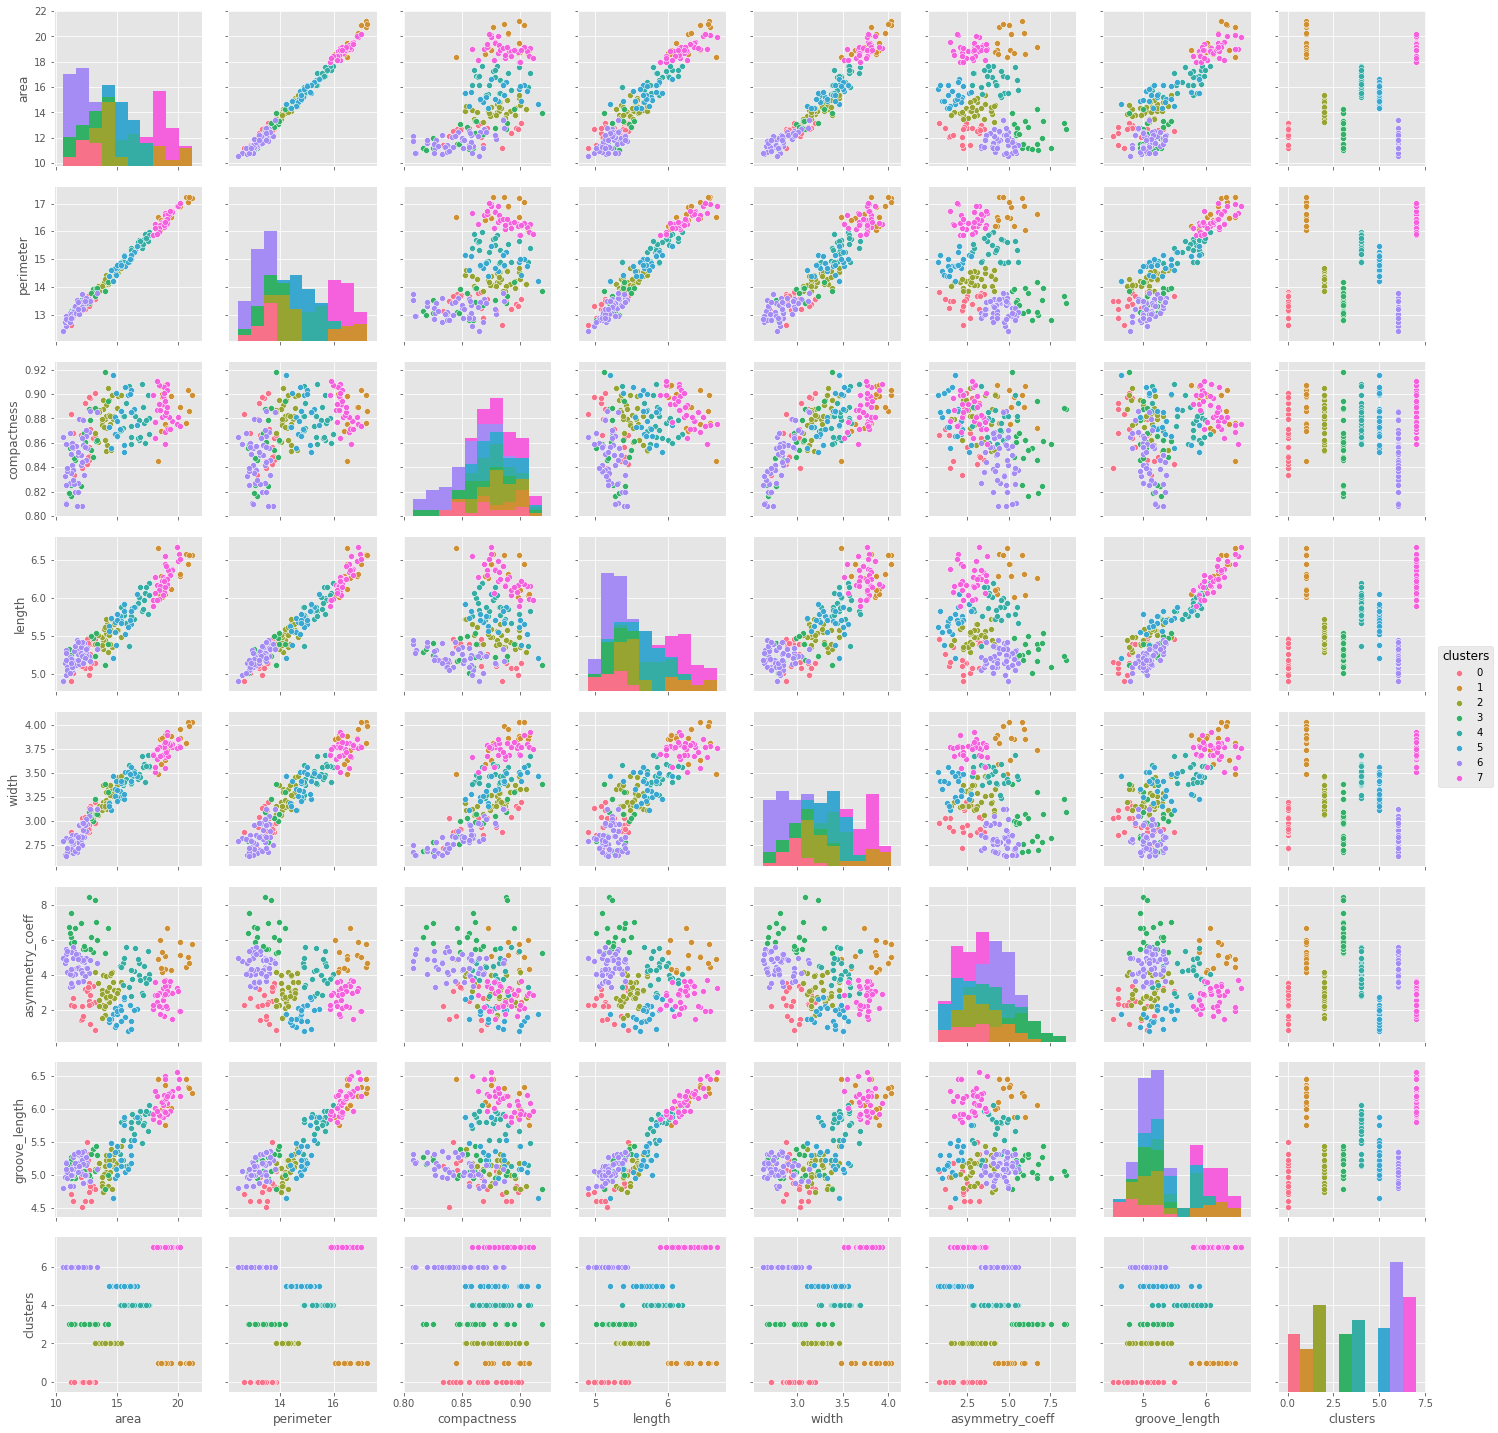

In [24]:
X_8 = seeds.drop('species', axis=1)
X_8['clusters'] = labels

sns.pairplot(data=X_8, hue='clusters')

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [45]:
import random

random.randint(1,25), random.randint(1,25)

(25, 4)

In [56]:
# A: K = 25
Kmean_25 = KMeans(n_clusters=25)   # using default n_clusters=8
Kmean_25.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
labels_25 = Kmean_25.labels_
print labels_25

[13 18  3  3 21  3  5  3  7  7 22 18 24 24  3  5 23 21 18 14  3  3 21  9 13
 21 24 19  3 24 18  5  5  3 13  7  7  7  5 15  3  3 19 22  5 18 21  5 13 13
  5 22  5  5 18 13  3 18 13  9  9  9 14 24 19 19 18  3 18 14  1 10 10 12 10
 10  1 16  8  7 10 17 16  4  4 12 12  8 16 16  4 12 12 17  8  1  8 12 12 12
 10 12  8  8  8 12 12  1  4 12 12  8 12 17 16 12  8 12  8  4 16  1 10 12  7
  8  8 12  4 10 12 12 22 10 22  5  1  7  7 10 23 15 23 23  2 20  9  2 14  6
  2 20  2 11 11  6 11  2  2  6 14  2  2  2 20  9  2 14 11 11 20 20 11  6  6
  6  6  6  6  9  6  2  2  6 23 11  2 11 20  6  6 11 11  6  2 23 23 23 14 19
 23 19 11  0 14 14 11  0 11 23]


In [48]:
clusters = Kmean_25.cluster_centers_
print clusters

[[ 12.08166667  13.44583333   0.83985      5.32266667   2.83633333
    4.83491667   5.23975   ]
 [ 18.57266667  16.17666667   0.89194      6.13813333   3.71506667
    2.34326667   6.0404    ]
 [ 14.445       14.34625      0.8821125    5.487125     3.252875     1.43275
    5.074     ]
 [ 16.674       15.467        0.87572      5.8783       3.4938       4.5574
    5.7883    ]
 [ 12.19666667  13.31         0.8648       5.16644444   2.94844444
    1.73334444   4.90355556]
 [ 13.96133333  14.12133333   0.87996      5.45986667   3.21213333   2.6808
    5.02366667]
 [ 20.69666667  17.09         0.89055      6.46083333   3.94933333
    5.16633333   6.28233333]
 [ 19.21        16.52142857   0.88443571   6.32557143   3.78257143
    3.26942857   6.17271429]
 [ 13.375       13.795        0.88285      5.33925      3.1735       7.62275
    5.12425   ]
 [ 11.35857143  12.97928571   0.8474       5.12914286   2.77492857
    3.81364286   5.01714286]
 [ 16.09333333  15.20666667   0.87446667   5.87066667 

In [58]:
silhouette_score(X, labels_25)

0.31834042288171599

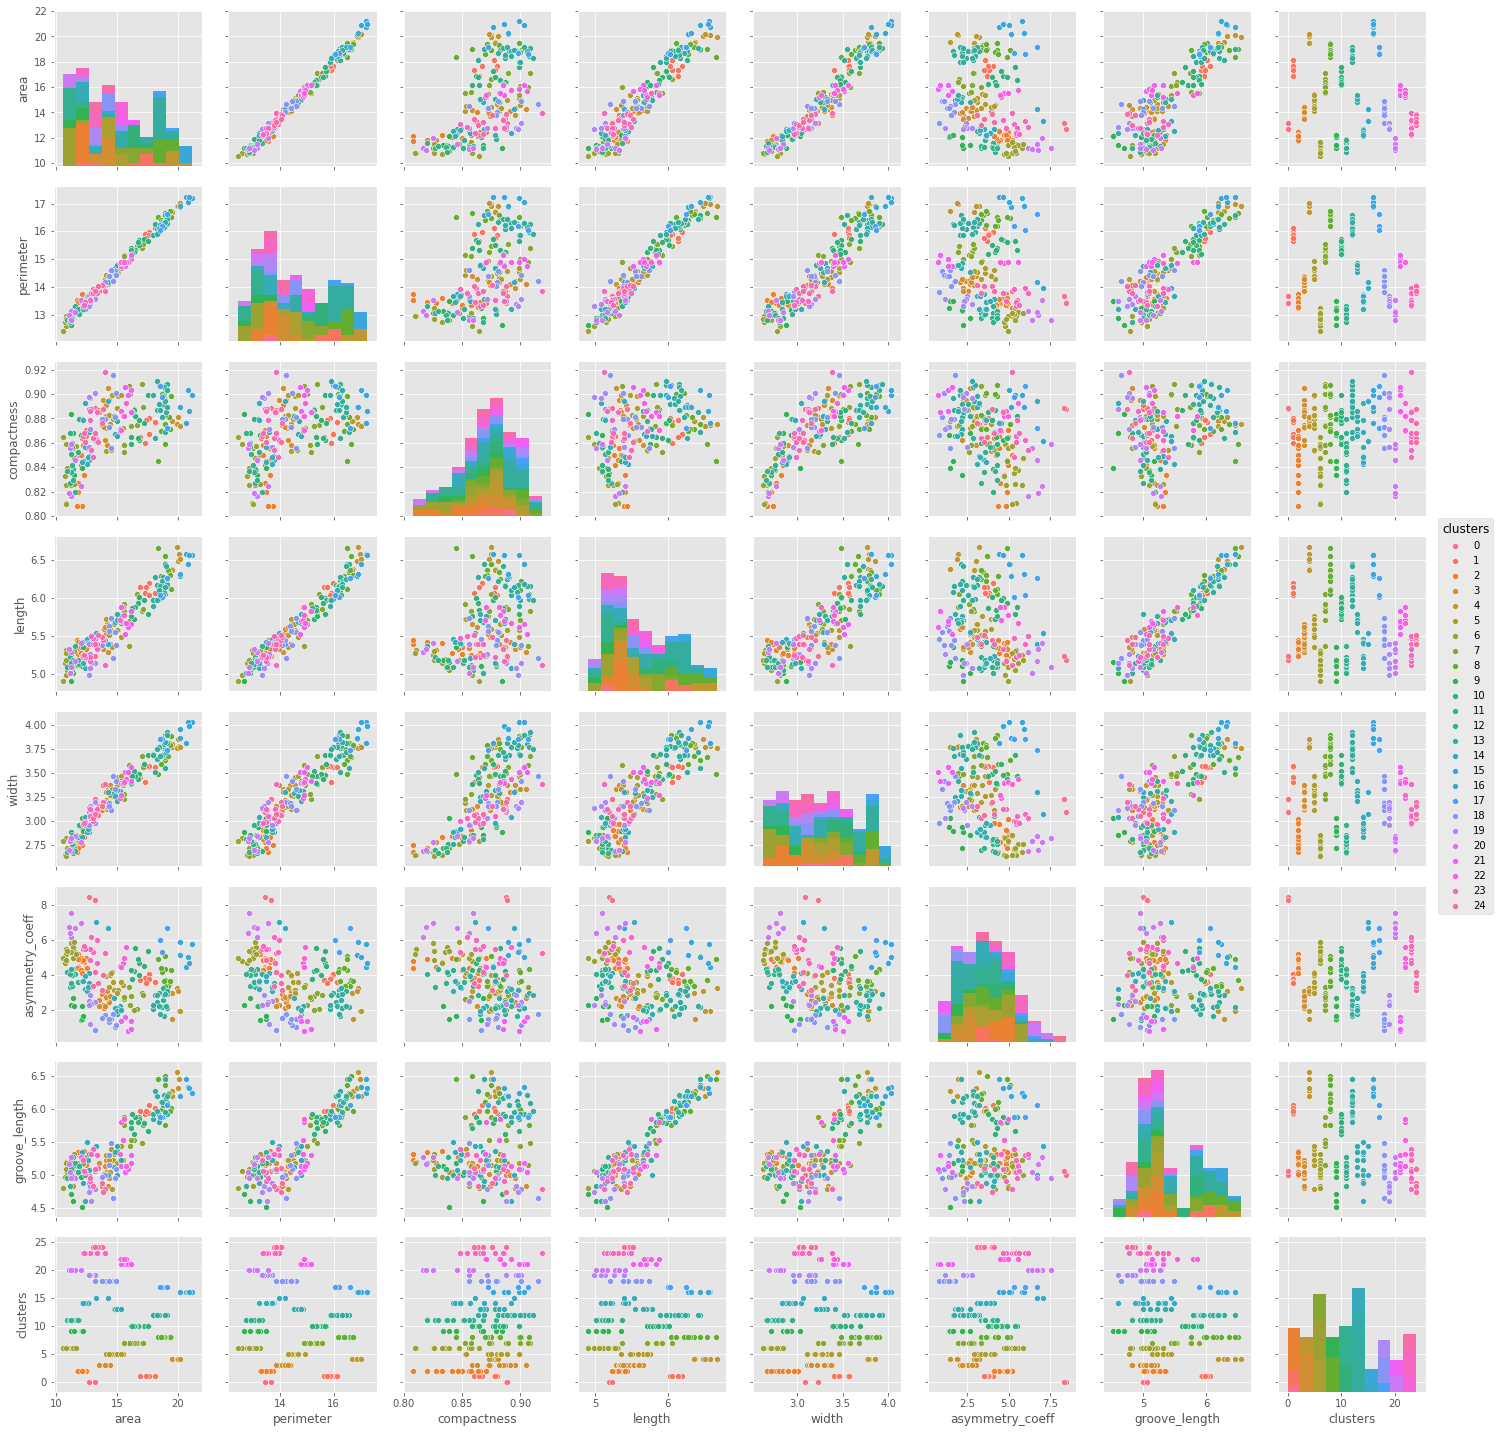

In [59]:
X_25 = seeds.drop('species', axis=1)
X_25['clusters'] = labels_25

sns.pairplot(data=X_25, hue='clusters')

Conclusion: With K = 25, there is a reduction in silhouette score, and all pairs have overlap, and no distinct clusters identified.

In [51]:
# A: K = 4
Kmean_4 = KMeans(n_clusters=4)   # using default n_clusters=8
Kmean_4.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
labels_4 = Kmean_4.labels_
print labels_4

[1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 3 1 0 3 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1
 1 1 3 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2
 1 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 1 3 3 3 3 3 3 0 3
 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 0 3 3 3 3 3 3 3 3]


In [54]:
clusters_4 = Kmean_4.cluster_centers_
print clusters_4

[[ 13.38744681  13.86468085   0.87411277   5.36661702   3.11334043
    2.45285319   4.99274468]
 [ 15.71909091  14.97659091   0.88038636   5.74518182   3.3985       3.18704773
    5.44838636]
 [ 18.96296296  16.39666667   0.88595185   6.24272222   3.74992593
    3.54033333   6.10077778]
 [ 11.89430769  13.25261538   0.84996923   5.22870769   2.86076923
    5.08230769   5.10561538]]


In [63]:
silhouette_score(X, labels_4)

0.48482525642413365

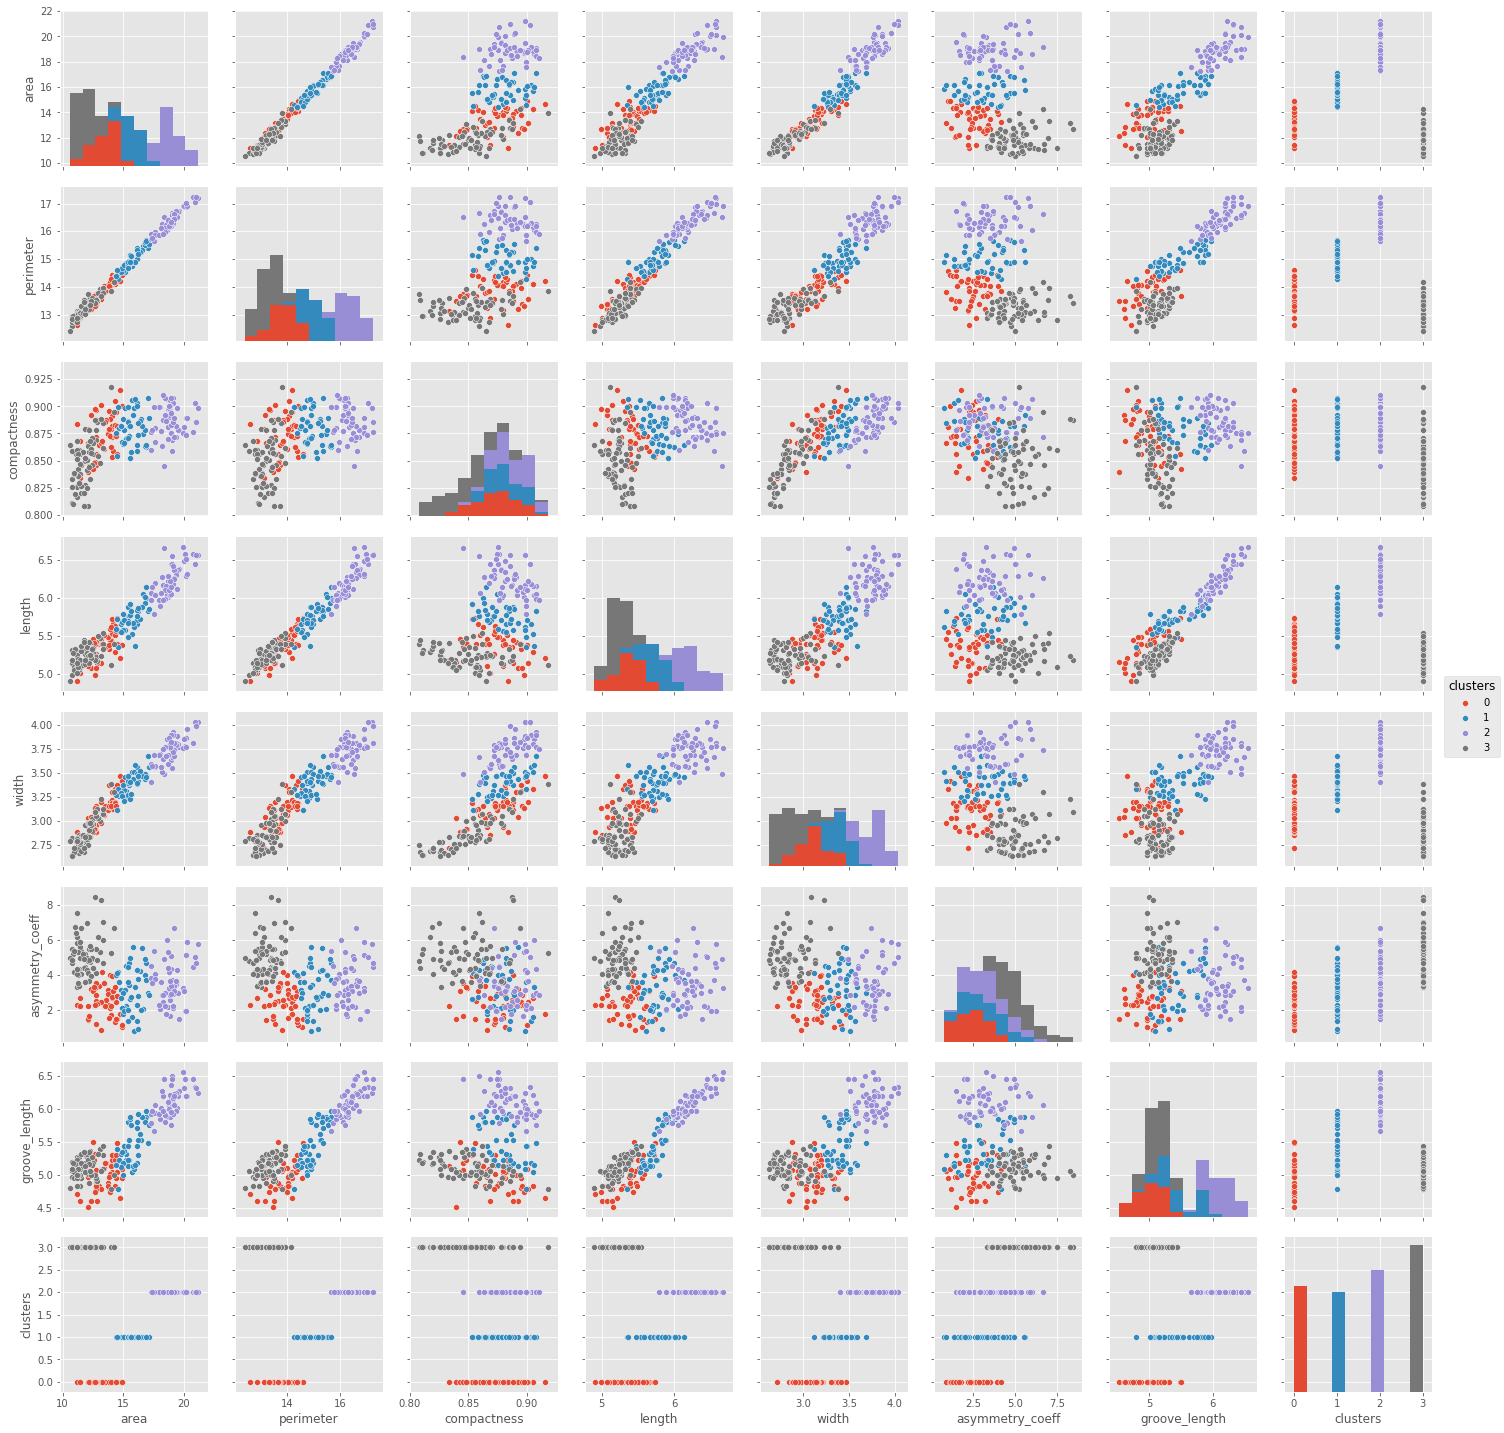

In [61]:
X_4 = seeds.drop('species', axis=1)
X_4['clusters'] = labels_4

sns.pairplot(data=X_4, hue='clusters')

Conclusion: With K=4, there is an increase in the silhouette score, and significantly less overlap with the clusters in the pairplot area vs. symmerty_coefficient, and parameter vs. symmerty_coefficient is a close second.

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [ ]:
# A: